In [3]:
# Installs latest version of TensorFlow 2.X 
!pip install --upgrade tensorflow

In [5]:
# Print tensorflow version
import tensorflow as tf
print(tf.__version__)

2.6.0


In [17]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
from tensorflow import keras

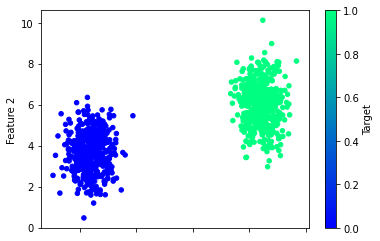

In [7]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [9]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [10]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [13]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [14]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [20]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


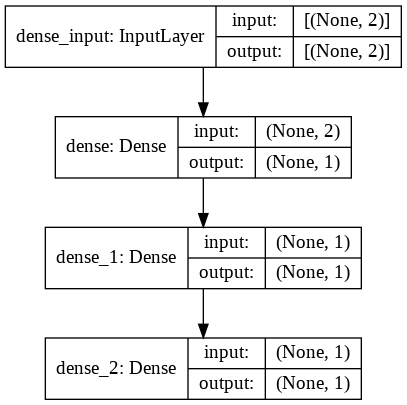

In [19]:
# Model Structure
keras.utils.plot_model(nn_model, show_shapes=True)

In [21]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.7403 - accuracy: 0.2800
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7284 - accuracy: 0.3053
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7192 - accuracy: 0.3280
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7124 - accuracy: 0.3427
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7072 - accuracy: 0.3680
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7032 - accuracy: 0.3933
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.4120
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6982 - accuracy: 0.4373
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6967 - accuracy: 0.4587
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.4680
Epoch 11/

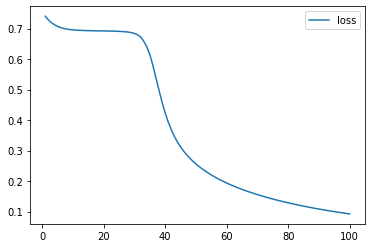

In [26]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

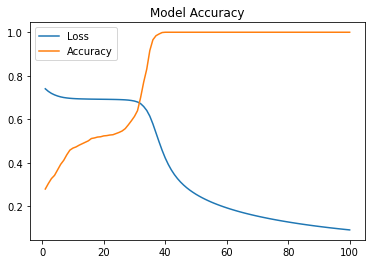

In [29]:
# Graphing accuracy and loss functions
import matplotlib.pyplot as plt
plt.title('Model Accuracy')
plt.plot(history_df['loss'], label='Loss')
plt.plot(history_df['accuracy'], label='Accuracy')
plt.legend()
plt.show()

In [31]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0866 - accuracy: 1.0000
Loss: 0.08656689524650574, Accuracy: 1.0


In [32]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

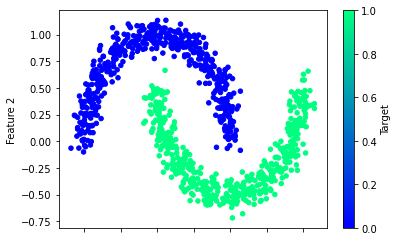

In [34]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [35]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [36]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8041 - accuracy: 0.6560
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.6853
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.7053
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.7253
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7427
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.7480
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.7587
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4398 - accuracy: 0.7653
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.7720
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.7813
Epoch 11/

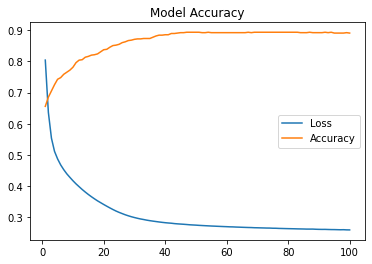

In [37]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Graphing accuracy and loss functions
import matplotlib.pyplot as plt
plt.title('Model Accuracy')
plt.plot(history_df['loss'], label='Loss')
plt.plot(history_df['accuracy'], label='Accuracy')
plt.legend()
plt.show()

In [38]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [39]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [40]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4807 - accuracy: 0.7573
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4535 - accuracy: 0.8173
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.8547
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4083 - accuracy: 0.8720
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3895 - accuracy: 0.8747
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3728 - accuracy: 0.8747
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3581 - accuracy: 0.8747
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 0.8773
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3333 - accuracy: 0.8773
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3232 - accuracy: 0.8773
Epoch 11/